# Basic Path Setup

In [1]:
%load_ext autoreload
%autoreload
from personlab.data import coco

base_dir = 'dataset/coco/'
anno_dir = base_dir + 'annotations/'
train_base_dir = base_dir + 'train2017/'
val_base_dir = base_dir + 'val2017/'

train_inst_json = anno_dir + 'instances_train2017.json'
train_person_json = anno_dir + 'person_keypoints_train2017.json'
val_inst_json = anno_dir + 'instances_val2017.json'
val_person_json = anno_dir + 'person_keypoints_val2017.json'


# Training Script

In [ ]:
from personlab.model import train
from personlab.models.mobilenet_v2 import mobilenet_v2_model
gen = coco.CocoDataGenerator(train_base_dir, train_inst_json, train_person_json)

pm_check_path = 'pretrained/mobilenet/mobilenet_v2_1.0_224.ckpt'
log_dir = 'logs/sample/'

train(mobilenet_v2_model, gen.loader, pm_check_path, log_dir)

# Evaluation Script

In [2]:
%load_ext autoreload
%autoreload
import tensorflow as tf
from personlab.model import evaluate
from personlab.models.mobilenet_v2 import mobilenet_v2_model
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

tf.reset_default_graph()
latest_ckp = tf.train.latest_checkpoint('./')


gen = coco.CocoDataGenerator(val_base_dir, val_inst_json, val_person_json)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
loading annotations into memory...
Done (t=0.28s)
creating index...
index created!


In [ ]:
checkpoint_dir = 'logs/20210520_161612/'
#checkpoint_dir = 'logs/sample/'
checkpoint_path = tf.train.latest_checkpoint(checkpoint_dir)
if checkpoint_path == None:
    checkpoint_path = checkpoint_dir+'model.ckpt'

In [3]:
checkpoint_dir = 'logs/20210521_163745/'
checkpoint_path = checkpoint_dir+'model.ckpt-126544'
print(checkpoint_path)

logs/20210521_163745/model.ckpt-126544


In [4]:
#print_tensors_in_checkpoint_file(checkpoint_path, all_tensors=False, tensor_name='', all_tensor_names=True)
output = evaluate(mobilenet_v2_model, gen.loader, checkpoint_path, num_batches=2)





INFO:tensorflow:Restoring parameters from logs/20210521_163745/model.ckpt-126544


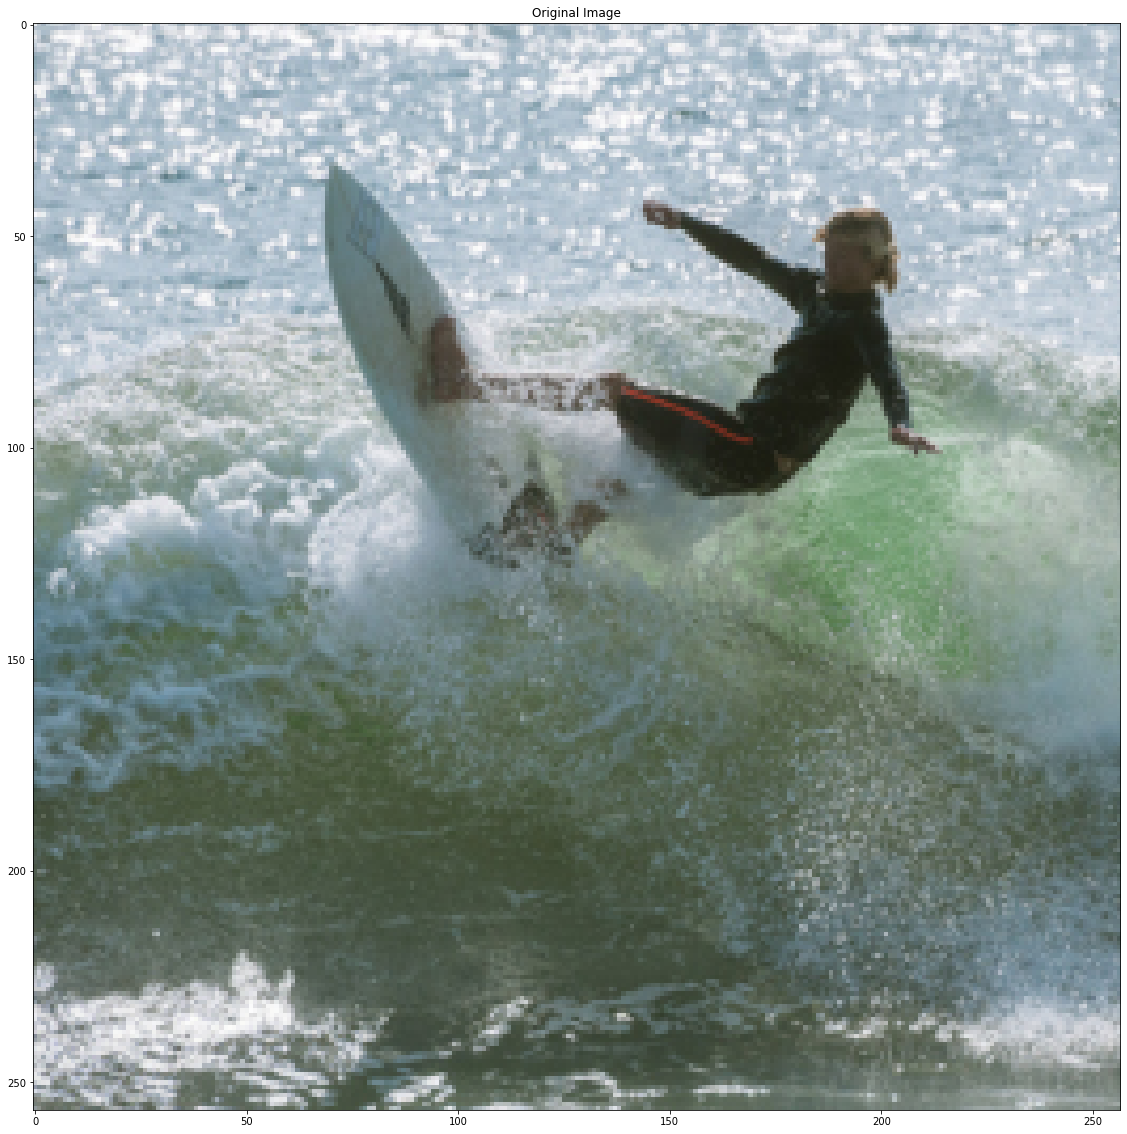

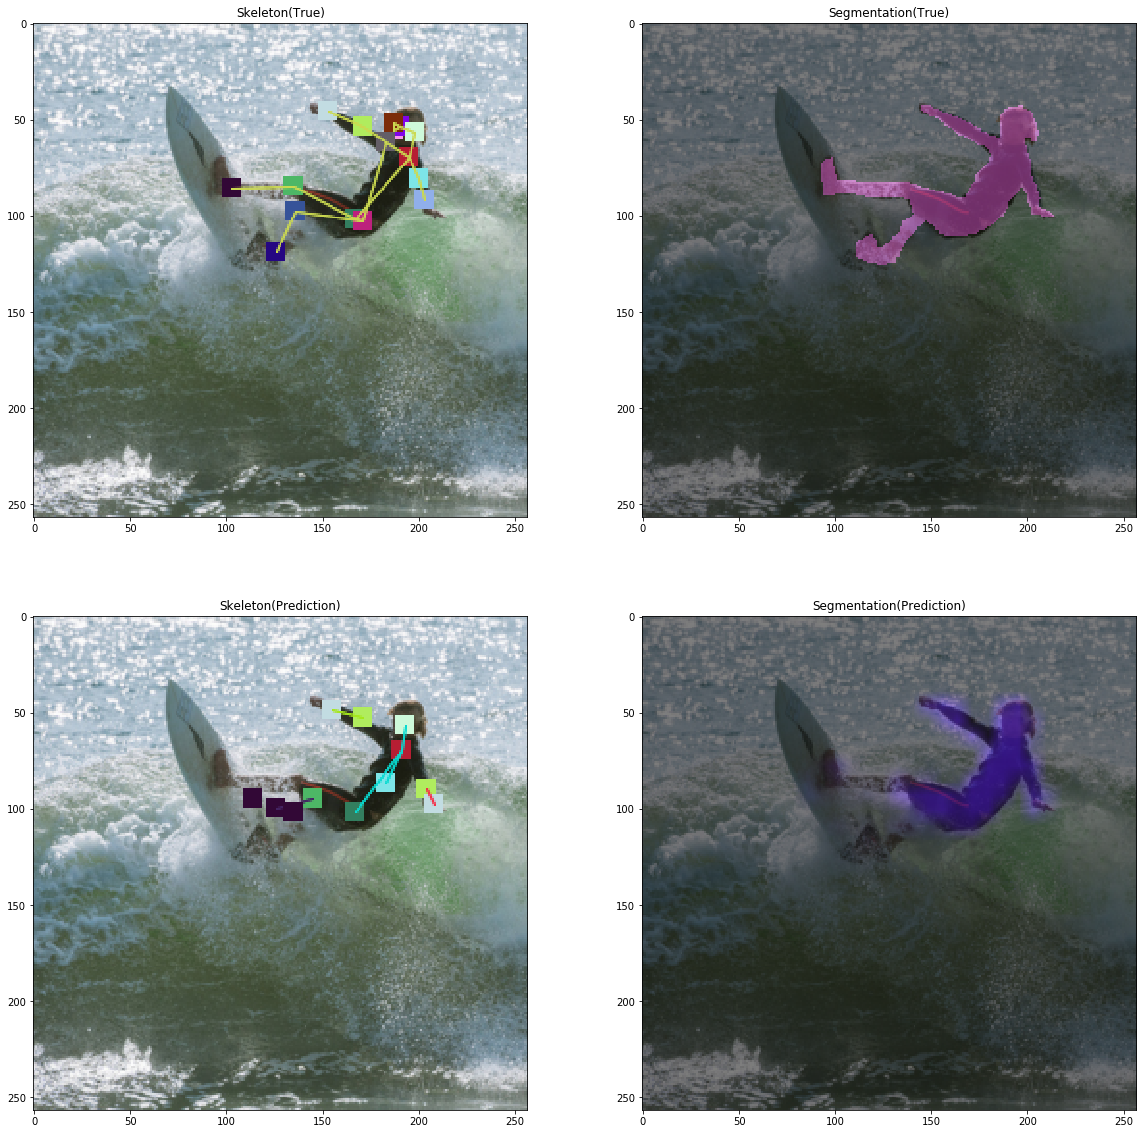

In [5]:
from matplotlib import pyplot as plt
from personlab import display, config
import numpy as np
plt.rcParams['figure.figsize'] = [20, 20]
b_i = 5
plt.figure()
plt.title('Original Image')
plt.imshow(output['image'][b_i])

plt.figure()

plt.subplot(2, 2, 1)
plt.title('Skeleton(True)')
plt.imshow(display.summary_skeleton(output['image'][b_i], output['kp_map_true'][b_i]))

plt.subplot(2, 2, 2)
plt.title('Segmentation(True)')
plt.imshow(display.show_heatmap(output['image'][b_i], output['seg_true'][b_i]))

plt.subplot(2, 2, 3)
plt.title('Skeleton(Prediction)')
plt.imshow(display.summary_skeleton(output['image'][b_i], output['kp_map_pred'][b_i]))

plt.subplot(2, 2, 4)
plt.title('Segmentation(Prediction)')
plt.imshow(display.show_heatmap(output['image'][b_i], output['seg_pred'][b_i]))